In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Comando mágico para exibir gráficos dentro do notebook
%matplotlib inline

In [4]:
# Carregar o CSV consolidado
df = pd.read_csv("all_fib48_combined.csv")

# Remover espaços extras dos nomes das colunas (se houver)
df.columns = df.columns.str.strip()

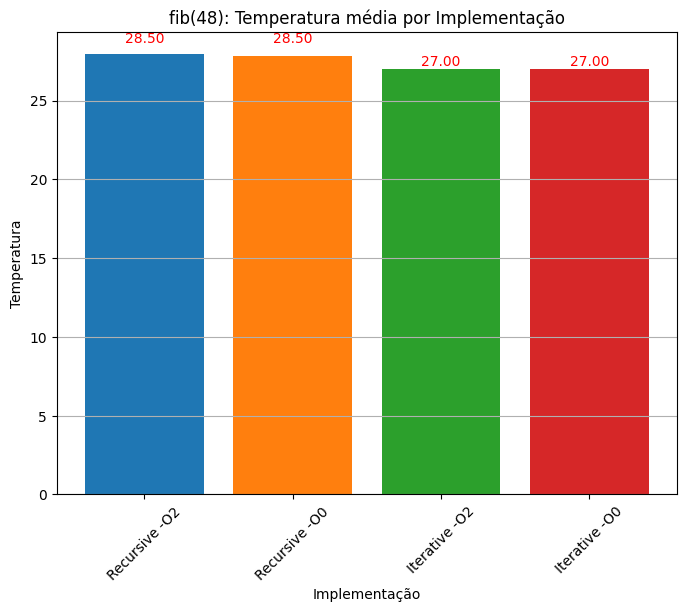

In [5]:
# tempo de execucao
plt.figure(figsize=(8,6))
for impl in df["Implementation"].unique():
    subset = df[df["Implementation"] == impl]
    mean_time = subset["Temperature"].mean()
    max_time = subset["Temperature"].max()  # Valor máximo da implementação
    plt.bar(impl, mean_time, label=impl)

    # Adicionar o valor máximo acima da barra
    plt.text(impl, max_time, f"{max_time:.2f}", ha="center", va="bottom", fontsize=10, color="red")

plt.xlabel("Implementação")
plt.ylabel("Temperatura")
plt.title("fib(48): Temperatura média por Implementação")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.yscale('linear')
plt.show()

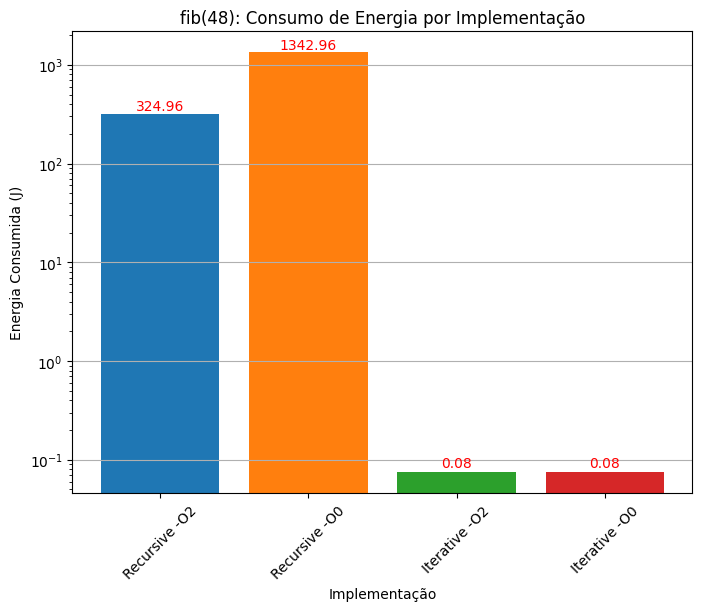

In [4]:
#consumo de energia
df["Energy (J)"] = df["Package"]  

# Criar o gráfico de barras
plt.figure(figsize=(8,6))
for impl in df["Implementation"].unique():
    subset = df[df["Implementation"] == impl]
    mean_energy = subset["Energy (J)"].mean()
    max_energy = subset["Energy (J)"].max()  # Valor máximo de energia para essa implementação
    plt.bar(impl, mean_energy, label=impl)

    # Adicionar o valor máximo acima da barra
    plt.text(impl, max_energy, f"{max_energy:.2f}", ha="center", va="bottom", fontsize=10, color="red")

plt.xlabel("Implementação")
plt.ylabel("Energia Consumida (J)")
plt.title("fib(48): Consumo de Energia por Implementação")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.yscale('log')  # Manter a escala logarítmica para melhor visualização
plt.show()

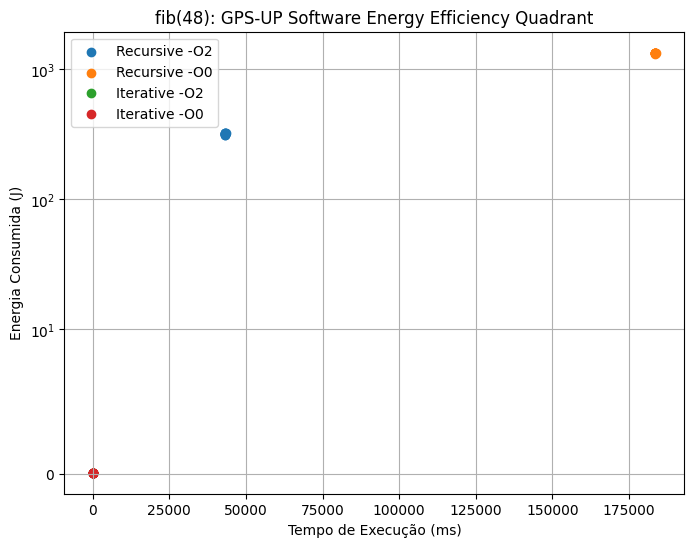

In [5]:
#GPS-UP
plt.figure(figsize=(8,6))
for impl in df["Implementation"].unique():
    subset = df[df["Implementation"] == impl]
    plt.scatter(subset["Time (ms)"], subset["Energy (J)"], label=impl)

plt.xlabel("Tempo de Execução (ms)")
plt.ylabel("Energia Consumida (J)")
plt.title("fib(48): GPS-UP Software Energy Efficiency Quadrant")
plt.legend()
plt.grid(True)
plt.yscale("symlog", linthresh=10)  # linthresh define a região linear antes da escala log

In [6]:
# tempos de execução para cada implementação
time_recursive_o0 = df[df["Implementation"] == "Recursive -O0"]["Time (ms)"].mean()
time_recursive_o2 = df[df["Implementation"] == "Recursive -O2"]["Time (ms)"].mean()
time_iterative_o0 = df[df["Implementation"] == "Iterative -O0"]["Time (ms)"].mean()
time_iterative_o2 = df[df["Implementation"] == "Iterative -O2"]["Time (ms)"].mean()

# consumos de energia total
energy_recursive_o0 = df[df["Implementation"] == "Recursive -O0"]["Energy (J)"].mean()
energy_recursive_o2 = df[df["Implementation"] == "Recursive -O2"]["Energy (J)"].mean()
energy_iterative_o0 = df[df["Implementation"] == "Iterative -O0"]["Energy (J)"].mean()
energy_iterative_o2 = df[df["Implementation"] == "Iterative -O2"]["Energy (J)"].mean()

In [7]:
# Cálculo das métricas com flag -o2
speedup = time_recursive_o2 / time_iterative_o2

greenup = energy_recursive_o2 / energy_iterative_o2

powerup = speedup / greenup

In [8]:
# Criar DataFrame com as métricas
metrics = pd.DataFrame({
    "Metric": ["Speedup", "Greenup", "Powerup"],
    "Value": [speedup, greenup, powerup]
})

# Exibir as métricas
print("fib(48): Métricas de Performance (-O2):")
print(metrics)

fib(48): Métricas de Performance (-O2):
    Metric        Value
0  Speedup  5408.000000
1  Greenup  4299.140237
2  Powerup     1.257926


In [9]:
# Cálculo das métricas com flag -o0
speedup = time_recursive_o0 / time_iterative_o0

greenup = energy_recursive_o0 / energy_iterative_o0

powerup = speedup / greenup

In [10]:
# Criar DataFrame com as métricas
metrics = pd.DataFrame({
    "Metric": ["Speedup", "Greenup", "Powerup"],
    "Value": [speedup, greenup, powerup]
})

# Exibir as métricas
print("fib(48): Métricas de Performance (-O0):")
print(metrics)

fib(48): Métricas de Performance (-O0):
    Metric       Value
0  Speedup  22931.5500
1  Greenup  17911.0713
2  Powerup      1.2803
